# Sprint 4

## Problem 1, 2, 3, 4 and 5

In [1]:
import numpy as np
from numpy.random import *
import random

In [2]:
class ScratchLogisticRegression():
    
    def __init__(self, num_iter, lr, bias, verbose,lam=0.1):
        
        """
        インスタンス変数初期化
        """
        
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter+1)
        self.val_loss = np.zeros(self.iter+1)
        self.lam = lam
        np.random.seed(0)

    def fit(self, X, y, X_val=None, y_val=None):  
        
        """
        線形回帰の学習
        """
        #intializing the loss and theta
        self.theta = np.random.rand(X.shape[1]+1)
        self.loss[0] = self.mean_crossentropy_error(X,y)  
        if X_val is not None:
            self.val_loss[0] = self.mean_crossentropy_error(X_val,y_val)
 
        #Going through the number of iteration and getting the loss
        for n in range(self.iter):
            self.loss[n+1] = self.gradient_descent(X,y)
            if X_val is not None:
                self.val_loss[n+1] = self.mean_crossentropy_error(X_val,y_val)
        print(self.predict_proba(X)) 

        if self.verbose: 
            print()
        pass

    def gradient_descent(self,X,y):
        
        """
        最急降下法によるパラメータの更新値計算
        """
            
        error = (self.predict_proba(X) - y.flatten())
        grad= np.dot(X.T,error)/X.shape[0]
        bias_grad = np.sum(error)/X.shape[0]
        l2 = self.lam * self.theta[:-1] / X.shape[0]
        self.theta[:-1] = self.theta[:-1] - self.lr * (grad + l2)
        self.theta[-1] = self.theta[-1] - self.lr * bias_grad
        loss = self.mean_crossentropy_error(X,y)
        return loss
        

    def predict(self, X):
        
        """
        ロジスティック回帰でのラベル推定
        """
        #Checking and comparing the value of the predicted probability in order to determine the class
        return  np.where(self.predict_proba(X) >= 0.5,1,0)

    def predict_proba(self, X):  
        
        """
        ロジスティック回帰での確率の推定
        """
        #Linear combination
        a = np.dot(self.theta[:-1],X.T) + self.theta[-1]
        
        #Hypothetical function
        y = self.sigmoid(a)
        return y
        pass
        return
    
    def sigmoid(self,a):
        return 1 / (1 + np.exp(-a))
    
    def mean_crossentropy_error(self,X,t):
        
        """
        損失関数
        """
        #Defining the crossentropy error and adding weight decay, L2 regularisation
        y = self.predict_proba(X)
        crossentropy =  -np.sum(t *  np.log(y) + (1-t) * np.log(1-y))/X.shape[0]
        l2_decay = np.sum(self.theta[:-1]**2)/(2 * X.shape[0])
        return crossentropy + l2_decay 

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
y = np.where(y==1, 0, 1)
X = np.array(X)
y = np.array(y)
y = y.reshape([100,1])

In [4]:
iris_df = pd.DataFrame(X, columns=["sepal_length","sepal_width", "petal_length", "petal_width"])
iris_label = pd.DataFrame(y, columns=["Species"])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5


In [5]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0,)

In [6]:
slr = ScratchLogisticRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)
slr.fit(X_train,y_train.reshape(-1,1),X_test,y_test.reshape(-1,1))

[0.5833805  0.49670525 0.61366377 0.52057144 0.59607262 0.51965487
 0.47278053 0.61952885 0.59871669 0.59866049 0.52444401 0.55246838
 0.48885129 0.52744871 0.49138753 0.47976152 0.47694334 0.52355441
 0.54564242 0.53373686 0.57554665 0.62855935 0.46926831 0.59238359
 0.53698085 0.67518553 0.54457023 0.58106039 0.49508258 0.55122851
 0.48038805 0.47134917 0.55894486 0.50614346 0.48759281 0.52798883
 0.49319115 0.52498549 0.52650852 0.56202715 0.48546101 0.46353697
 0.52384001 0.57248714 0.65646699 0.50169442 0.60355487 0.63869795
 0.49742245 0.57676957 0.48119962 0.44779295 0.54158847 0.53311589
 0.51742529 0.62643565 0.51601505 0.42438174 0.5824046  0.59661824
 0.57376587 0.49781245 0.48832128 0.52031632 0.56365686 0.53974712
 0.58602515 0.65219706 0.49432668 0.52775237]



In [7]:
slr.predict(X)

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
slr.predict_proba(X)

array([0.46926831, 0.52444401, 0.48625273, 0.50378465, 0.49138753,
       0.53373686, 0.55490855, 0.51097053, 0.46875833, 0.56365686,
       0.48038805, 0.54457023, 0.42438174, 0.52311854, 0.52650852,
       0.47976152, 0.57632741, 0.47694334, 0.47278053, 0.48546101,
       0.60355487, 0.48832128, 0.4948912 , 0.49508258, 0.4778128 ,
       0.48119962, 0.46102424, 0.51965487, 0.53698085, 0.46353697,
       0.48441973, 0.47134917, 0.49319115, 0.54875501, 0.59238359,
       0.58106039, 0.49781245, 0.44779295, 0.54564242, 0.51742529,
       0.52355441, 0.52744871, 0.48885129, 0.49588447, 0.52775237,
       0.52934011, 0.53311589, 0.49432668, 0.50443461, 0.52384001,
       0.67518553, 0.59607262, 0.55122851, 0.57092562, 0.60742514,
       0.52743845, 0.61952885, 0.50614346, 0.51601505, 0.62855935,
       0.5833805 , 0.55246838, 0.56588576, 0.59871669, 0.65219706,
       0.62643565, 0.55894486, 0.58602515, 0.52057144, 0.50169442,
       0.59661824, 0.62366482, 0.49742245, 0.54029429, 0.59866

In [9]:
slr.predict_proba(X_test)

array([0.46102424, 0.66303542, 0.48625273, 0.52743845, 0.52740425,
       0.60928569, 0.57632741, 0.54029429, 0.60742514, 0.58740932,
       0.57092562, 0.59607262, 0.58726   , 0.52311854, 0.51097053,
       0.48441973, 0.4948912 , 0.4778128 , 0.54875501, 0.46875833,
       0.49588447, 0.56588576, 0.50378465, 0.62366482, 0.52934011,
       0.50443461, 0.55490855, 0.59760579, 0.5975116 , 0.55278979])

In [10]:
y_pred = slr.predict(X_test)
y_pred = y_pred.reshape(y_test.shape)

In [11]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.6521739130434783
1.0
0.7894736842105263
[[ 7  8]
 [ 0 15]]


## Problem 6

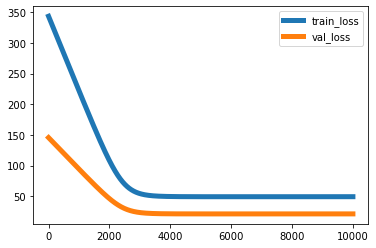

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(slr.loss)+1),slr.loss,label='train_loss',linewidth=5)
plt.plot(np.arange(1,len(slr.val_loss)+1),slr.val_loss,label='val_loss',linewidth=5)
plt.legend()

In [13]:
slr.theta

array([-0.33056426,  0.27295255,  0.09930097,  0.42457614,  0.25629857])

## Problem 7

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [15]:
X = iris.data[:100,:]
y = iris.target[:100]
X = X[:,[0,2]]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.5, random_state=0,)

In [16]:
slr = ScratchLogisticRegression(num_iter=10000, lr=1, bias=True, verbose=True)
slr.fit(X=X_train, y=y_train, X_val=X_test, y_val=y_test)

[0.99964386 0.9959605  0.00657687 0.01124911 0.00620216 0.99960327
 0.018097   0.00300252 0.02303376 0.99983959 0.00839788 0.00839788
 0.99959517 0.95869096 0.9712214  0.9994874  0.00944045 0.99964024
 0.00187438 0.99683945 0.01000882 0.01917647 0.00697406 0.9986559
 0.85274628 0.99489002 0.01936744 0.99855982 0.99988743 0.99990665
 0.01611399 0.00739505 0.98883491 0.01520424 0.01000882 0.99881741
 0.99952163 0.00784126 0.99780237 0.99986426 0.99906592 0.00341173
 0.01000882 0.99995956 0.01124911 0.99847236 0.99752762 0.98203725
 0.00881533 0.05211634]



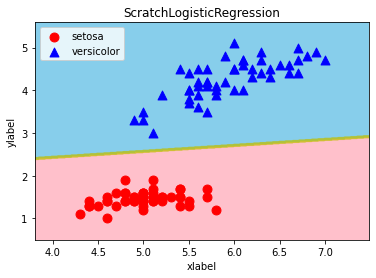

In [17]:
decision_region(X, y, slr, step=0.01, title='ScratchLogisticRegression', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor'])